In [1]:
import os
import tensorflow as tf
import pickle
import importlib


In [2]:
# mount google drive to download saved models and test (validation set)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [16]:
# setup virtual directories
VDIR_PROJECT = '/content/skin_cancer'
VDIR_PROJECT_TRAIN_VAL_SET = VDIR_PROJECT+'/train_val_set'
VDIR_PROJECT_TESTSET = VDIR_PROJECT+'/test_set'
VDIR_PROJECT_TESTSET_VAL = VDIR_PROJECT_TESTSET+'/val'
VDIR_PROJECT_MODELS = VDIR_PROJECT+'/models'
os.makedirs(VDIR_PROJECT_TRAIN_VAL_SET, exist_ok=True)
os.makedirs(VDIR_PROJECT_TESTSET, exist_ok=True)
os.makedirs(VDIR_PROJECT_MODELS, exist_ok=True)

# define source directory from Gdrive
GDIR_PROJECT_EDA_S1 = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/EDA_PrePro/S1'

# COPY S1 images with no augmentation. Only validation set is needed for evaluation
dataset_filename = 'S1_images.zip'
GDIR_DATASET_ZIPPED = os.path.join(GDIR_PROJECT_EDA_S1, dataset_filename)
!cp -r {GDIR_DATASET_ZIPPED} {VDIR_PROJECT_TRAIN_VAL_SET}



In [9]:
# unzip
!unzip {VDIR_PROJECT_TRAIN_VAL_SET}/{dataset_filename} -d {VDIR_PROJECT_TESTSET}/

Streaming output truncated to the last 5000 lines.
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0028720.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0024895.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0032198.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0033346.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0031035.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0024401.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0031863.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0028248.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0027791.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0033036.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0025786.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0026151.jpg  
  inflating: /content/skin_cancer/test_set/train/nv/ISIC_0034073.jpg  
  inflating: /content/skin

In [10]:
# define class list used during training
class_list = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [11]:
# copy trained models
GDIR_PROJECT_TRAINING_MODELS = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Training/models'

!cp -r {GDIR_PROJECT_TRAINING_MODELS}/* {VDIR_PROJECT_MODELS}

^C


In [12]:
# copy evaluation_functions.py from gdrive to current working directory
GDIR_PROJECT_COMMON_FUNCTIONS = '/content/drive/MyDrive/AAI-521/Module7/TeamProject/Common_Functions'

!cp -r {GDIR_PROJECT_COMMON_FUNCTIONS}/* ./

In [13]:
import evaluation_functions as ef
importlib.reload(ef)

evaluation_functions version: 0.0.3 is loaded.

evaluation_functions version: 0.0.3 is loaded.



<module 'evaluation_functions' from '/content/evaluation_functions.py'>

In [14]:
# define function that loads model weights (keras) & history (pickle)

def load_model_history_keras(models_dir, model_name):
  model_path = models_dir+'/'+model_name+'/model.keras'
  history_path = models_dir+'/'+model_name+'/training_history.pkl'

  model = tf.keras.models.load_model(model_path)
  with open(history_path, 'rb') as file:
    history = pickle.load(file)

  return model, history



Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



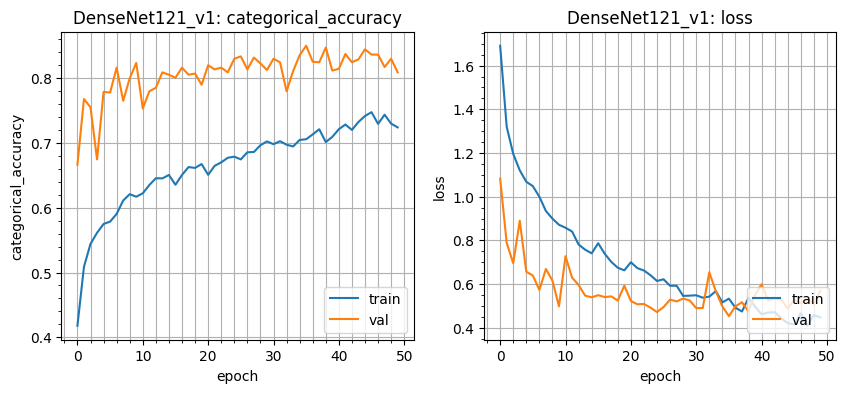

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
              precision    recall  f1-score   support

       akiec       0.26      0.73      0.38        30
         bcc       0.54      0.43      0.48        35
         bkl       0.53      0.58      0.56        86
          df       0.67      0.50      0.57         8
         mel       0.21      0.35      0.26        46
          nv       0.97      0.87      0.92       876
        vasc       0.50      0.77      0.61        13

    accuracy                           0.81      1094
   macro avg       0.53      0.60      0.54      1094
weighted avg       0.87      0.81      0.83      1094



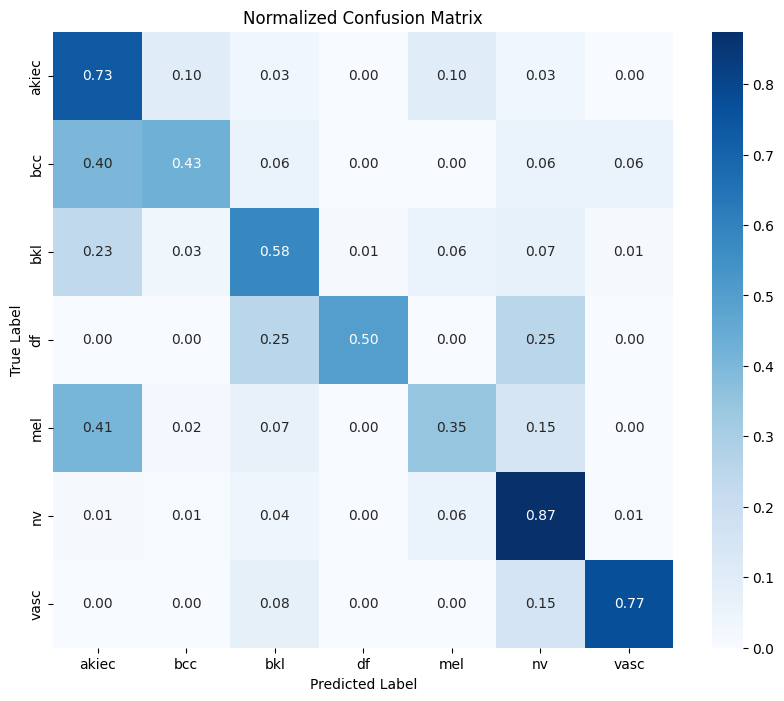

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



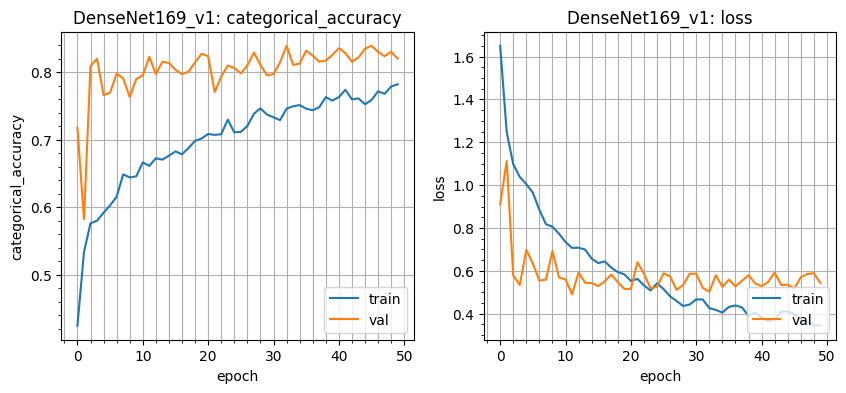

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step
              precision    recall  f1-score   support

       akiec       0.39      0.43      0.41        30
         bcc       0.49      0.54      0.51        35
         bkl       0.59      0.56      0.57        86
          df       0.44      0.50      0.47         8
         mel       0.22      0.41      0.29        46
          nv       0.97      0.91      0.94       876
        vasc       0.50      0.77      0.61        13

    accuracy                           0.83      1094
   macro avg       0.51      0.59      0.54      1094
weighted avg       0.86      0.83      0.85      1094



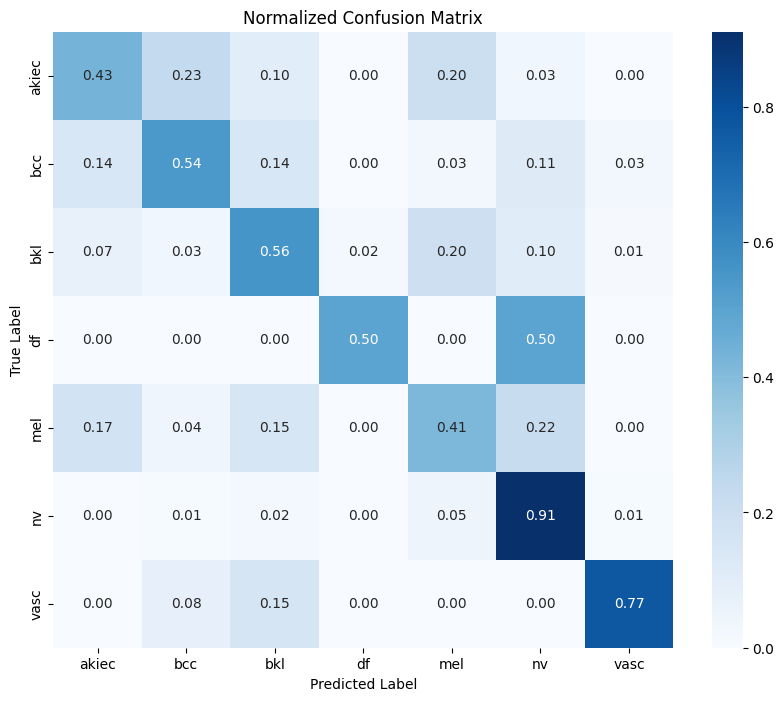

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



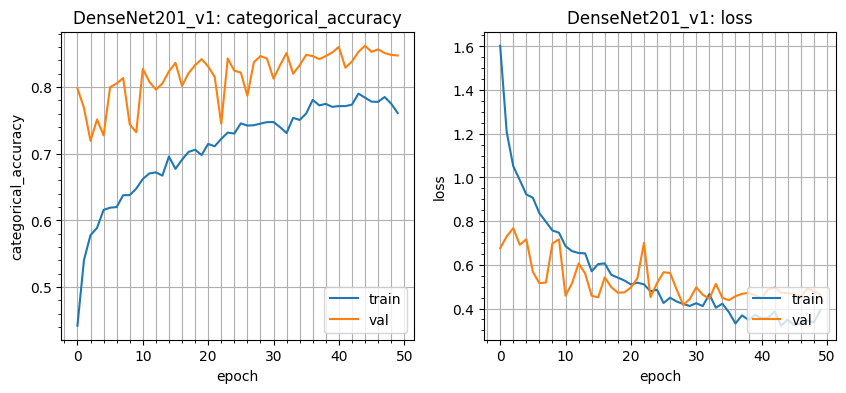

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step
              precision    recall  f1-score   support

       akiec       0.29      0.40      0.34        30
         bcc       0.54      0.60      0.57        35
         bkl       0.68      0.63      0.65        86
          df       0.23      0.38      0.29         8
         mel       0.30      0.39      0.34        46
          nv       0.97      0.93      0.95       876
        vasc       0.56      0.77      0.65        13

    accuracy                           0.85      1094
   macro avg       0.51      0.58      0.54      1094
weighted avg       0.87      0.85      0.86      1094



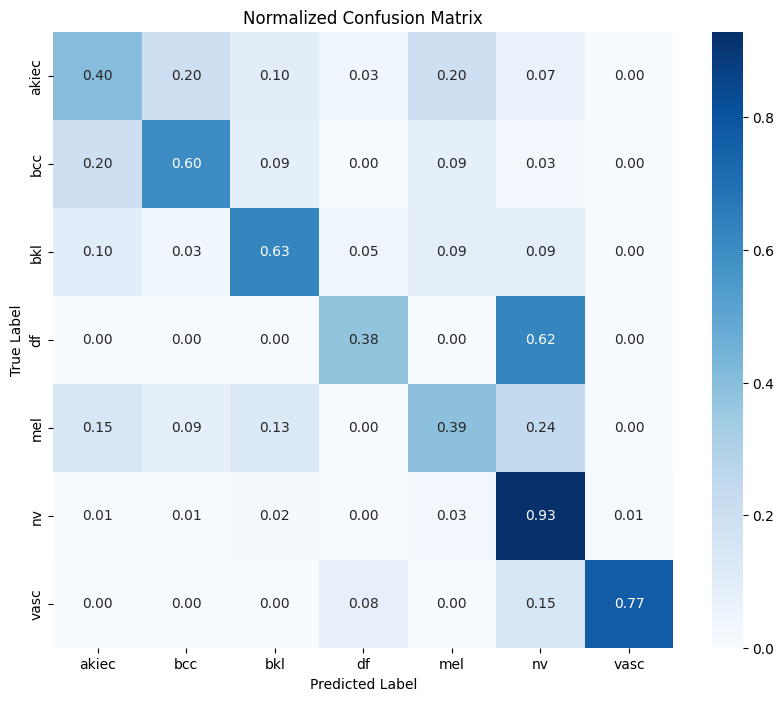

In [17]:
models_names = ['DenseNet121_v1', 'DenseNet169_v1', 'DenseNet201_v1']
models = [[] for i in range (len(models_names))]
histories = [[] for i in range (len(models_names))]

# load models and histories to evaluate
for i in range(len(models_names)):
  model, history = load_model_history_keras(VDIR_PROJECT_MODELS, models_names[i])
  models[i] = model
  histories[i] = history

  # evaluate
  ef.group5_evaluate(VDIR_PROJECT_TESTSET_VAL,
                     model=model,
                     model_name=models_names[i],
                     class_list =class_list,
                     training_history = history,
                     batch_size=256,
                     image_size = (224,224))



Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



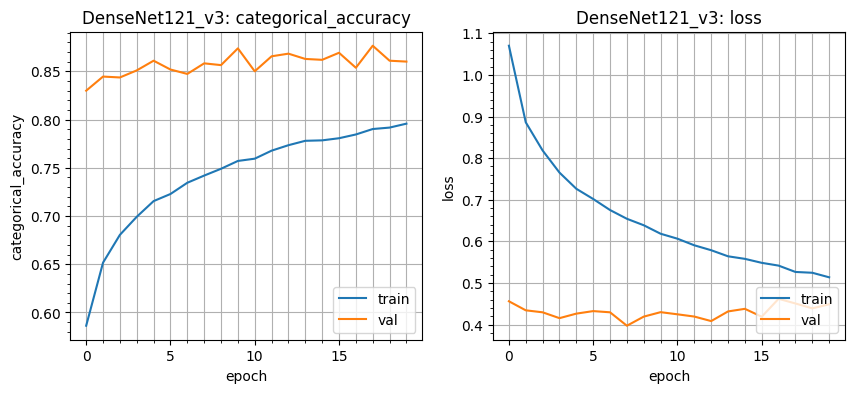

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step
              precision    recall  f1-score   support

       akiec       0.50      0.47      0.48        30
         bcc       0.60      0.51      0.55        35
         bkl       0.54      0.57      0.55        86
          df       0.43      0.38      0.40         8
         mel       0.32      0.35      0.33        46
          nv       0.95      0.95      0.95       876
        vasc       0.89      0.62      0.73        13

    accuracy                           0.86      1094
   macro avg       0.60      0.55      0.57      1094
weighted avg       0.86      0.86      0.86      1094



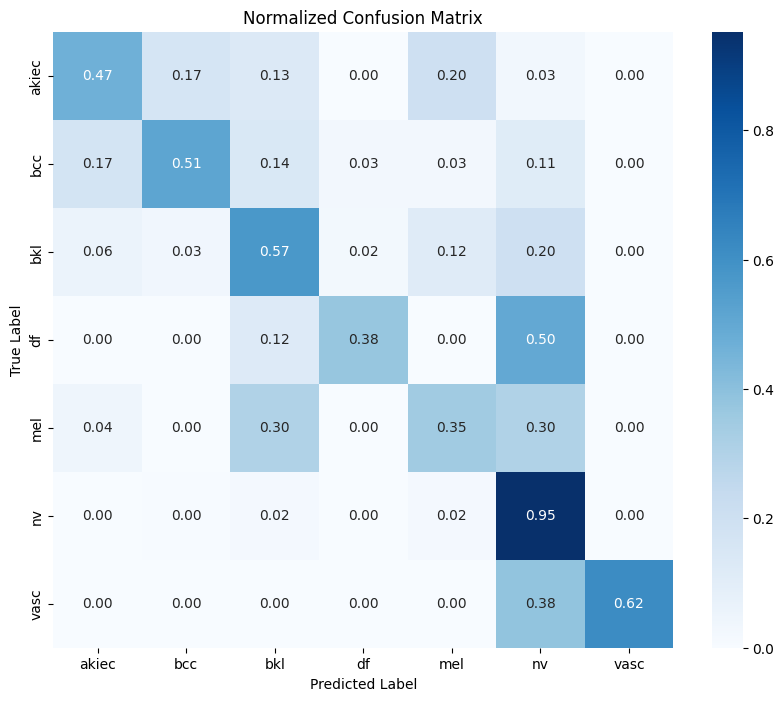

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



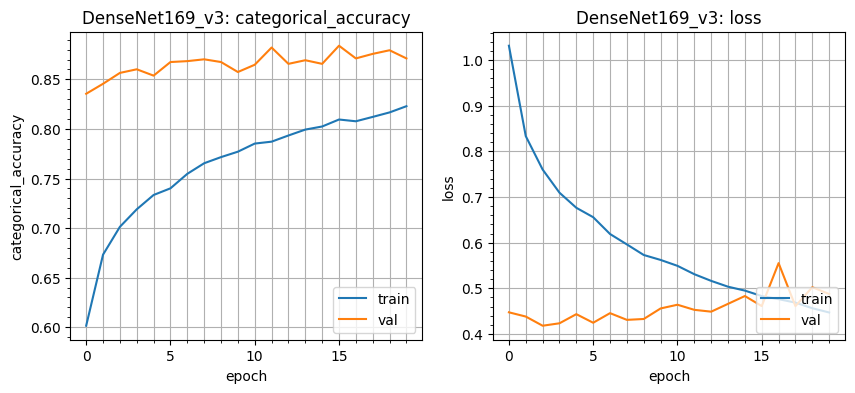

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step
              precision    recall  f1-score   support

       akiec       0.55      0.40      0.46        30
         bcc       0.55      0.66      0.60        35
         bkl       0.59      0.67      0.63        86
          df       0.80      0.50      0.62         8
         mel       0.36      0.35      0.35        46
          nv       0.96      0.95      0.95       876
        vasc       0.77      0.77      0.77        13

    accuracy                           0.87      1094
   macro avg       0.65      0.61      0.63      1094
weighted avg       0.88      0.87      0.87      1094



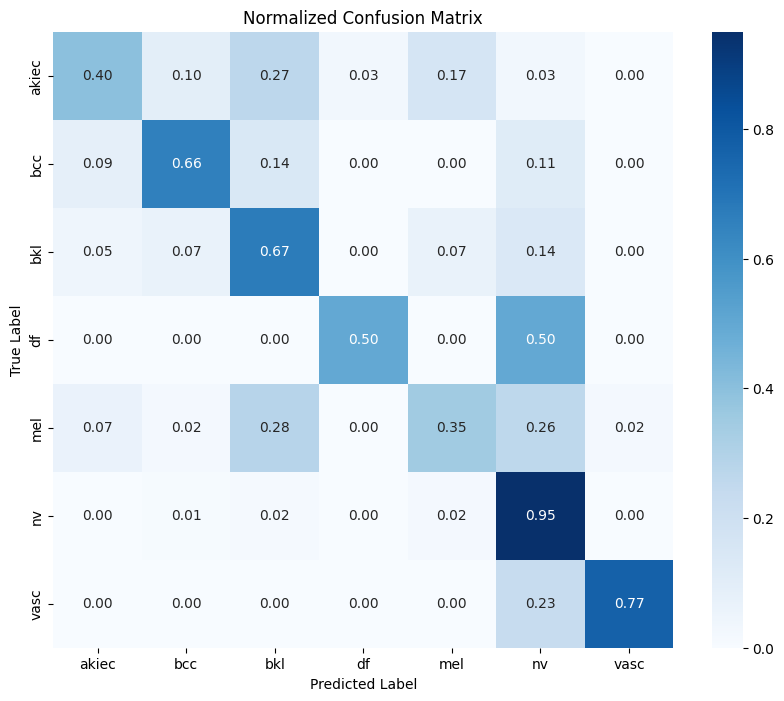

Available Metrics1: ['categorical_accuracy', 'loss']

Here1: metrics: ['categorical_accuracy' 'loss']

Metrics to display: ['categorical_accuracy' 'loss']

Num Rows:  1
plotA 0 train/val curves for metric categorical_accuracy

plotA 1 train/val curves for metric loss



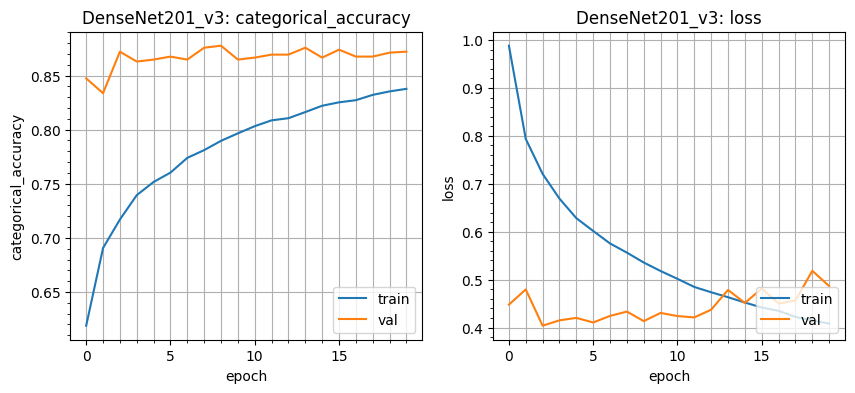

Found 1094 files belonging to 7 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
              precision    recall  f1-score   support

       akiec       0.36      0.27      0.31        30
         bcc       0.46      0.60      0.52        35
         bkl       0.63      0.69      0.66        86
          df       0.75      0.38      0.50         8
         mel       0.42      0.28      0.34        46
          nv       0.95      0.96      0.96       876
        vasc       0.71      0.77      0.74        13

    accuracy                           0.87      1094
   macro avg       0.61      0.56      0.57      1094
weighted avg       0.87      0.87      0.87      1094



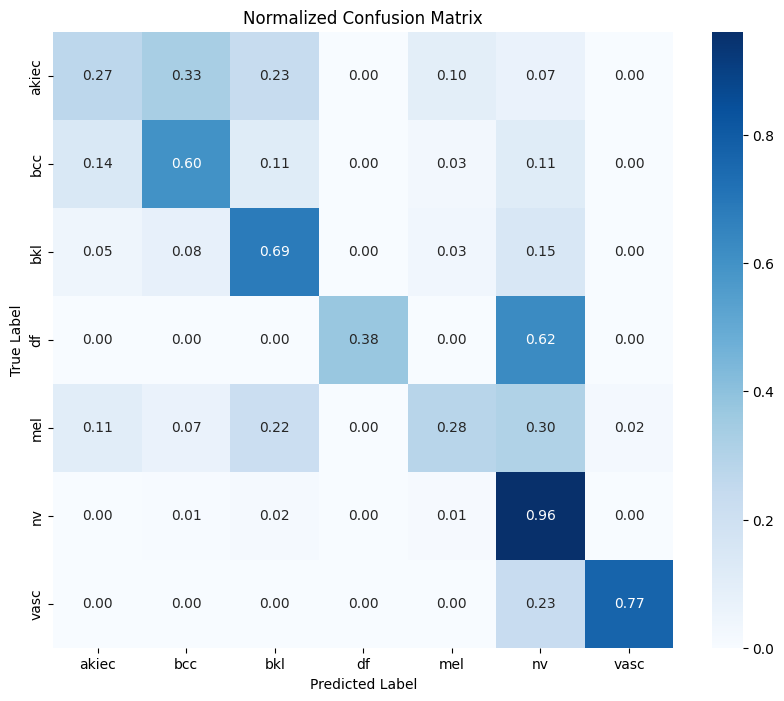

In [18]:
models_names = ['DenseNet121_v3', 'DenseNet169_v3', 'DenseNet201_v3']
models = [[] for i in range (len(models_names))]
histories = [[] for i in range (len(models_names))]

# load models and histories to evaluate
for i in range(len(models_names)):
  model, history = load_model_history_keras(VDIR_PROJECT_MODELS, models_names[i])
  models[i] = model
  histories[i] = history

  # evaluate
  ef.group5_evaluate(VDIR_PROJECT_TESTSET_VAL,
                     model=model,
                     model_name=models_names[i],
                     class_list =class_list,
                     training_history = history,
                     batch_size=256,
                     image_size = (224,224))

